In [1]:
import pandas as pd
import numpy as np

# Definição de ML: 

    - A computer program is said to learn from experience E with respect to some task T
    and some performance measure P, if its performance on T, as measured by P, improves
    with experience E. Tom Mitchell, 1997

No chap1 ele afirma que ML é útil em ambientes flutuantes, com novos dados; entender melhor isso me parece relevante para vida real "in production".

![](imgs/how-to-do-so.PNG)

# Tipos de ML

A parte da distinção supervised x unsupervised x semisupervised x reinforcement ele faz mais duas distinções:
 - Whether or not they can learn incrementally on the fly (online versus batch learning)
 - Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)


Fato interessante :

- In Machine Learning an attribute is a data type (e.g., “Mileage”), while a feature has several meanings depending on the context, but generally means an attribute plus its value (e.g., “Mileage = 15,000”). Many people use the words attribute and feature inter changeably, though.

Pelo que eu entendi me parece que o problema indoo-outdoor-incar é um problema de semisupervised learning :
 - Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data.
 - Most semisupervised learning algorithms are combinations of unsupervised and supervised algorithms. For example, deep belief networks (DBNs) are based on unsu‐ pervised components called restricted Boltzmann machines (RBMs) stacked on top of one another. RBMs are trained sequentially in an unsupervised manner, and then the whole system is fine-tuned using supervised learning techniques.


# Sobre batch learning

In batch learning, the system is incapable of learning incrementally: it must be trained
using all the available data. This will generally take a lot of time and computing
resources, so it is typically done offline. First the system is trained, and then it is
launched into production and runs without learning anymore; it just applies what it
has learned. This is called oine learning.
If you want a batch learning system to know about new data (such as a new type of
spam), you need to train a new version of the system from scratch on the full dataset
(not just the new data, but also the old data), then stop the old system and replace it
with the new one.


# Sobre online learning (incremental learning)

- In online learning, you train the system incrementally by feeding it data instances  sequentially, either individually or by small groups called mini-batches.
- Perceba que aqui o learning rate é importante: maior learning rate significa maior importancia dada a novas instancias

# Sobre instance x model based

- Instance usa uma medida de similaridade para tratar novos pontos 

### Sobre hiperparametros 

 A __hyperparameter__ is a parameter of a learning algorithm (not of the
model). As such, it is not affected by the learning algorithm itself; it must be set prior
to training and remains constant during training

Ele afirma que crossvalidation voce testa nos splits e no fim roda o modelo no full training set para fazer um ultimo teste 80-20 ou algo do tipo.



# Chapter 2 

### Ml datasets

http://archive.ics.uci.edu/ml/

https://www.kaggle.com/datasets

http://aws.amazon.com/fr/datasets/

http://dataportals.org/

http://opendatamonitor.eu/

http://quandl.com/

https://goo.gl/SJHN2k

http://goo.gl/zDR78y

https://www.reddit.com/r/datasets

A piece of information fed to a Machine Learning system is often called a __signal__ in reference to Shannon’s
information theory: you want a high signal/noise ratio.


### Importando o dataset

In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
     os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()


In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

## Descrevendo o dataset

 - Remember the __pd.DataFrame.info()__ method!!
 - __df.[col].value_counts()__ is also useful 
 - as well as  __df.describe()__
 - a quick way of inspecting a dataset is by calling df.hist(bins = nbins::int, figsize = Tuple{x::int,y::int})
 - those general inspecting methods work pretty well together; 
 

In [5]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["median_income"].value_counts();

In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

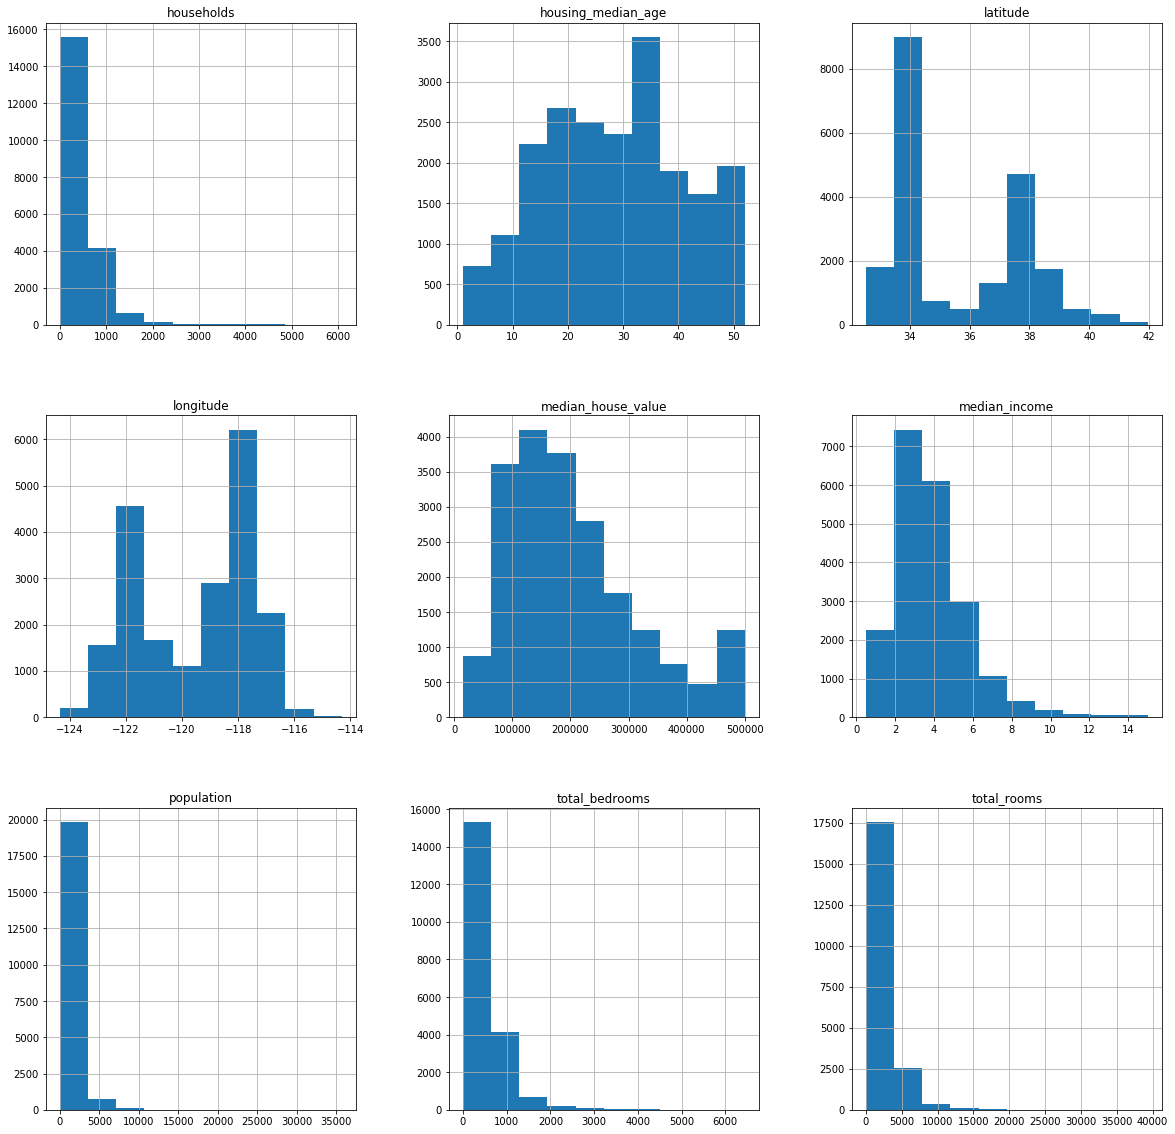

In [9]:
%matplotlib inline 
housing.hist(figsize = (20,20));

In [10]:
import seaborn as sns 

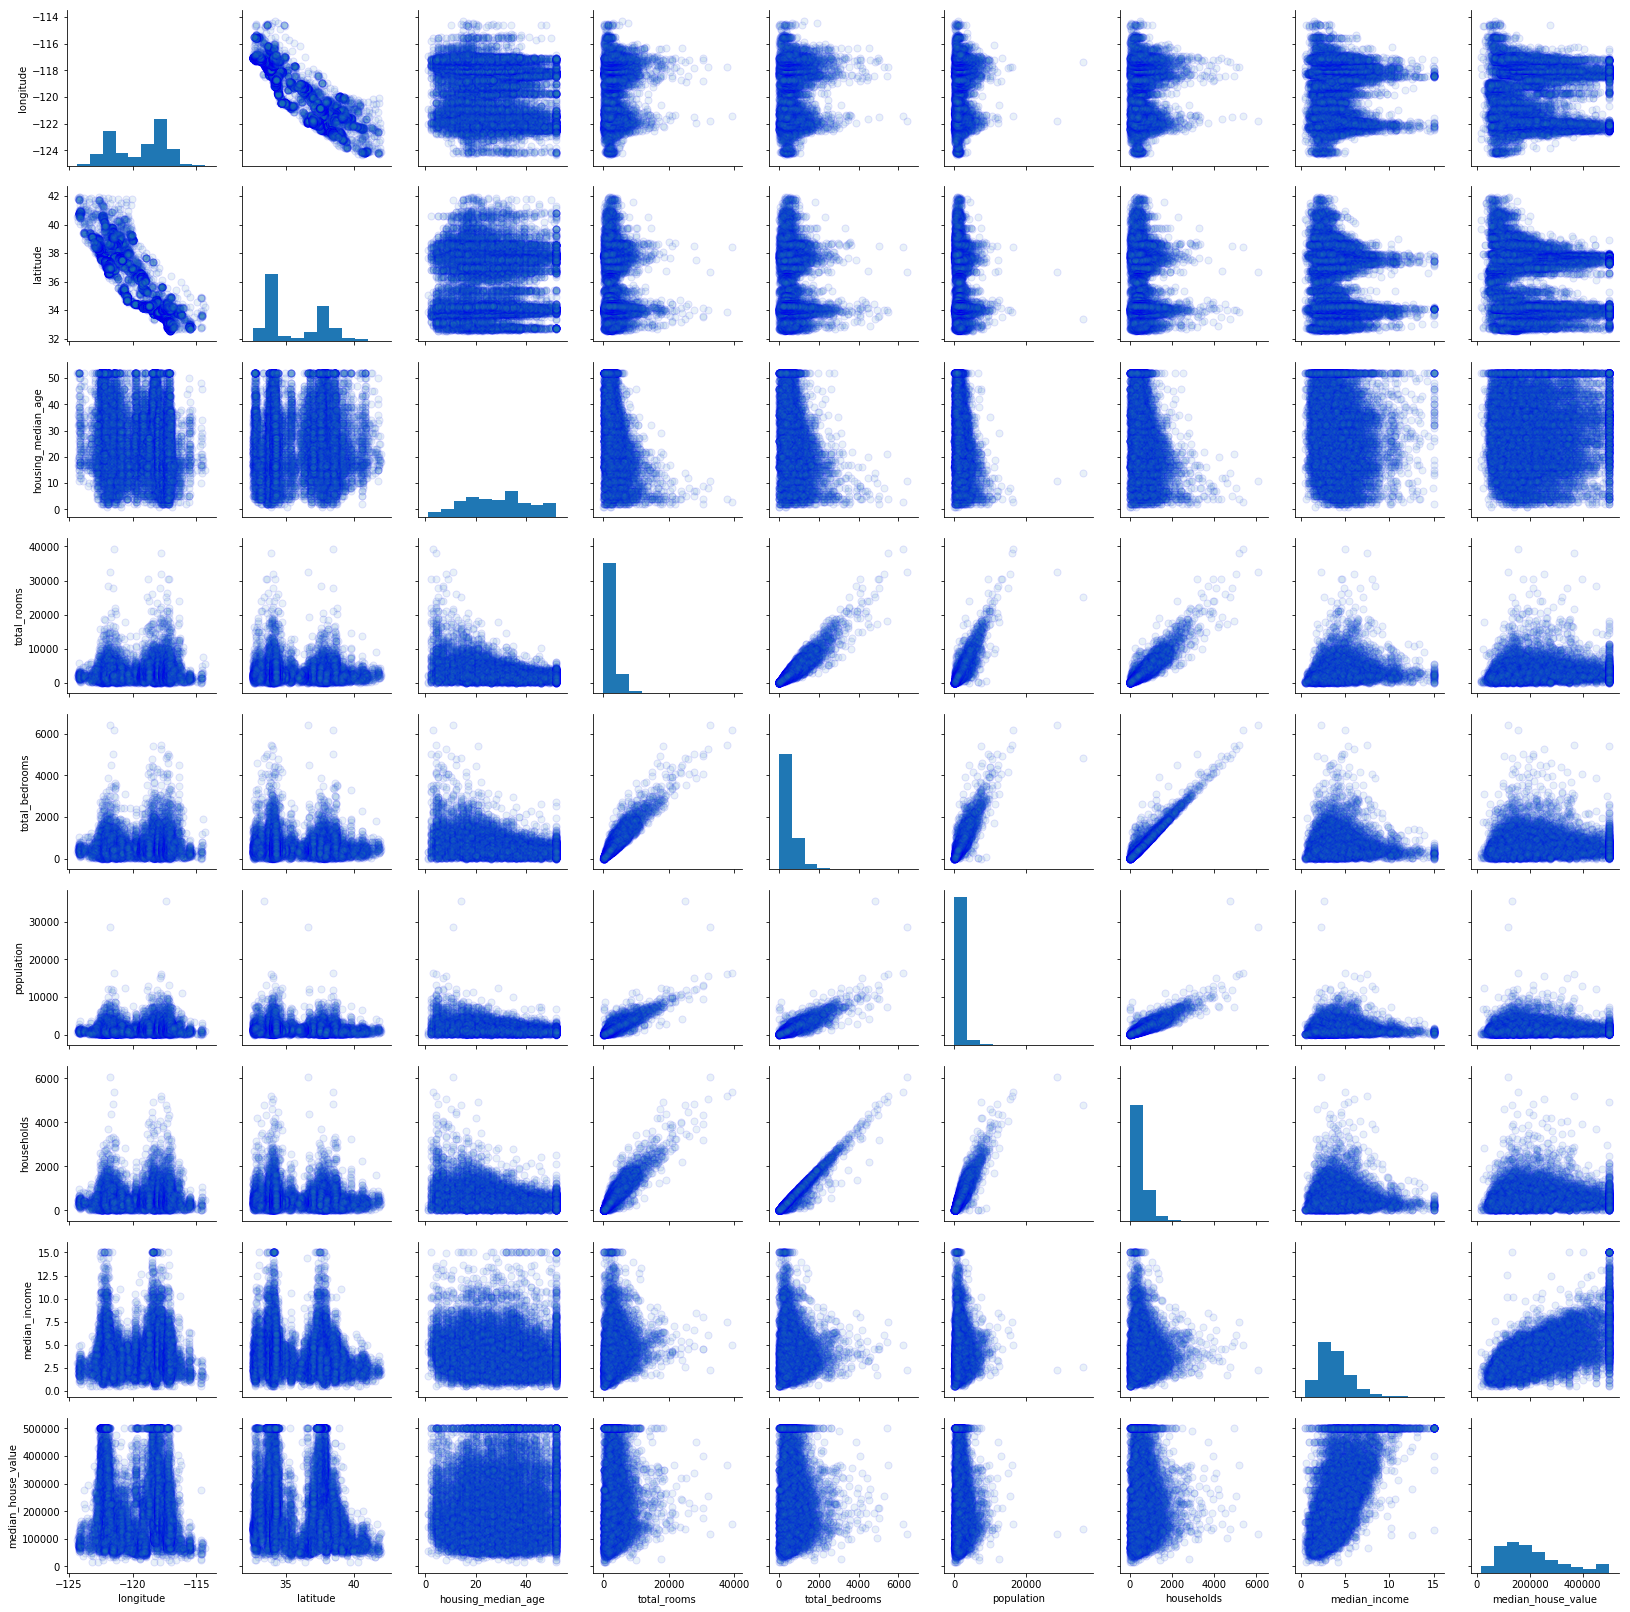

In [11]:
g = sns.pairplot(housing.dropna(),plot_kws=dict(s=50, edgecolor="b", linewidth=1, alpha = 0.1))

## Sobre stratified sampling 

When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone booth. They try to ensure that these 1,000 people
are representative of the whole population. 
For example, the US population is com‐
posed of 51.3% female and 48.7% male, so a well-conducted survey in the US would
try to maintain this ratio in the sample: 513 female and 487 male. This is called 
__stratified sampling__: the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population. If they used purely random sam‐
pling, there would be about 12% chance of sampling a skewed test set with either less
than 49% female or more than 54% female. 


It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s
importance may be biased. This means that you should not have too many strata, and
each stratum should be large enough. 


In [12]:
# random shuffling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:
# Create de strata
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# make the split based on the strata
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
#check the proportions
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

### Check that random shuffling is worse

In [15]:
housing = strat_train_set.copy()

In [16]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  income_cat  
17606       <1H OCEAN         2.0  
18632       <1H OCEAN         5.0  
14650      NEAR OCEAN         2.0  
3230           INLAND         2.0  
3555        <1H OCEAN         3.0

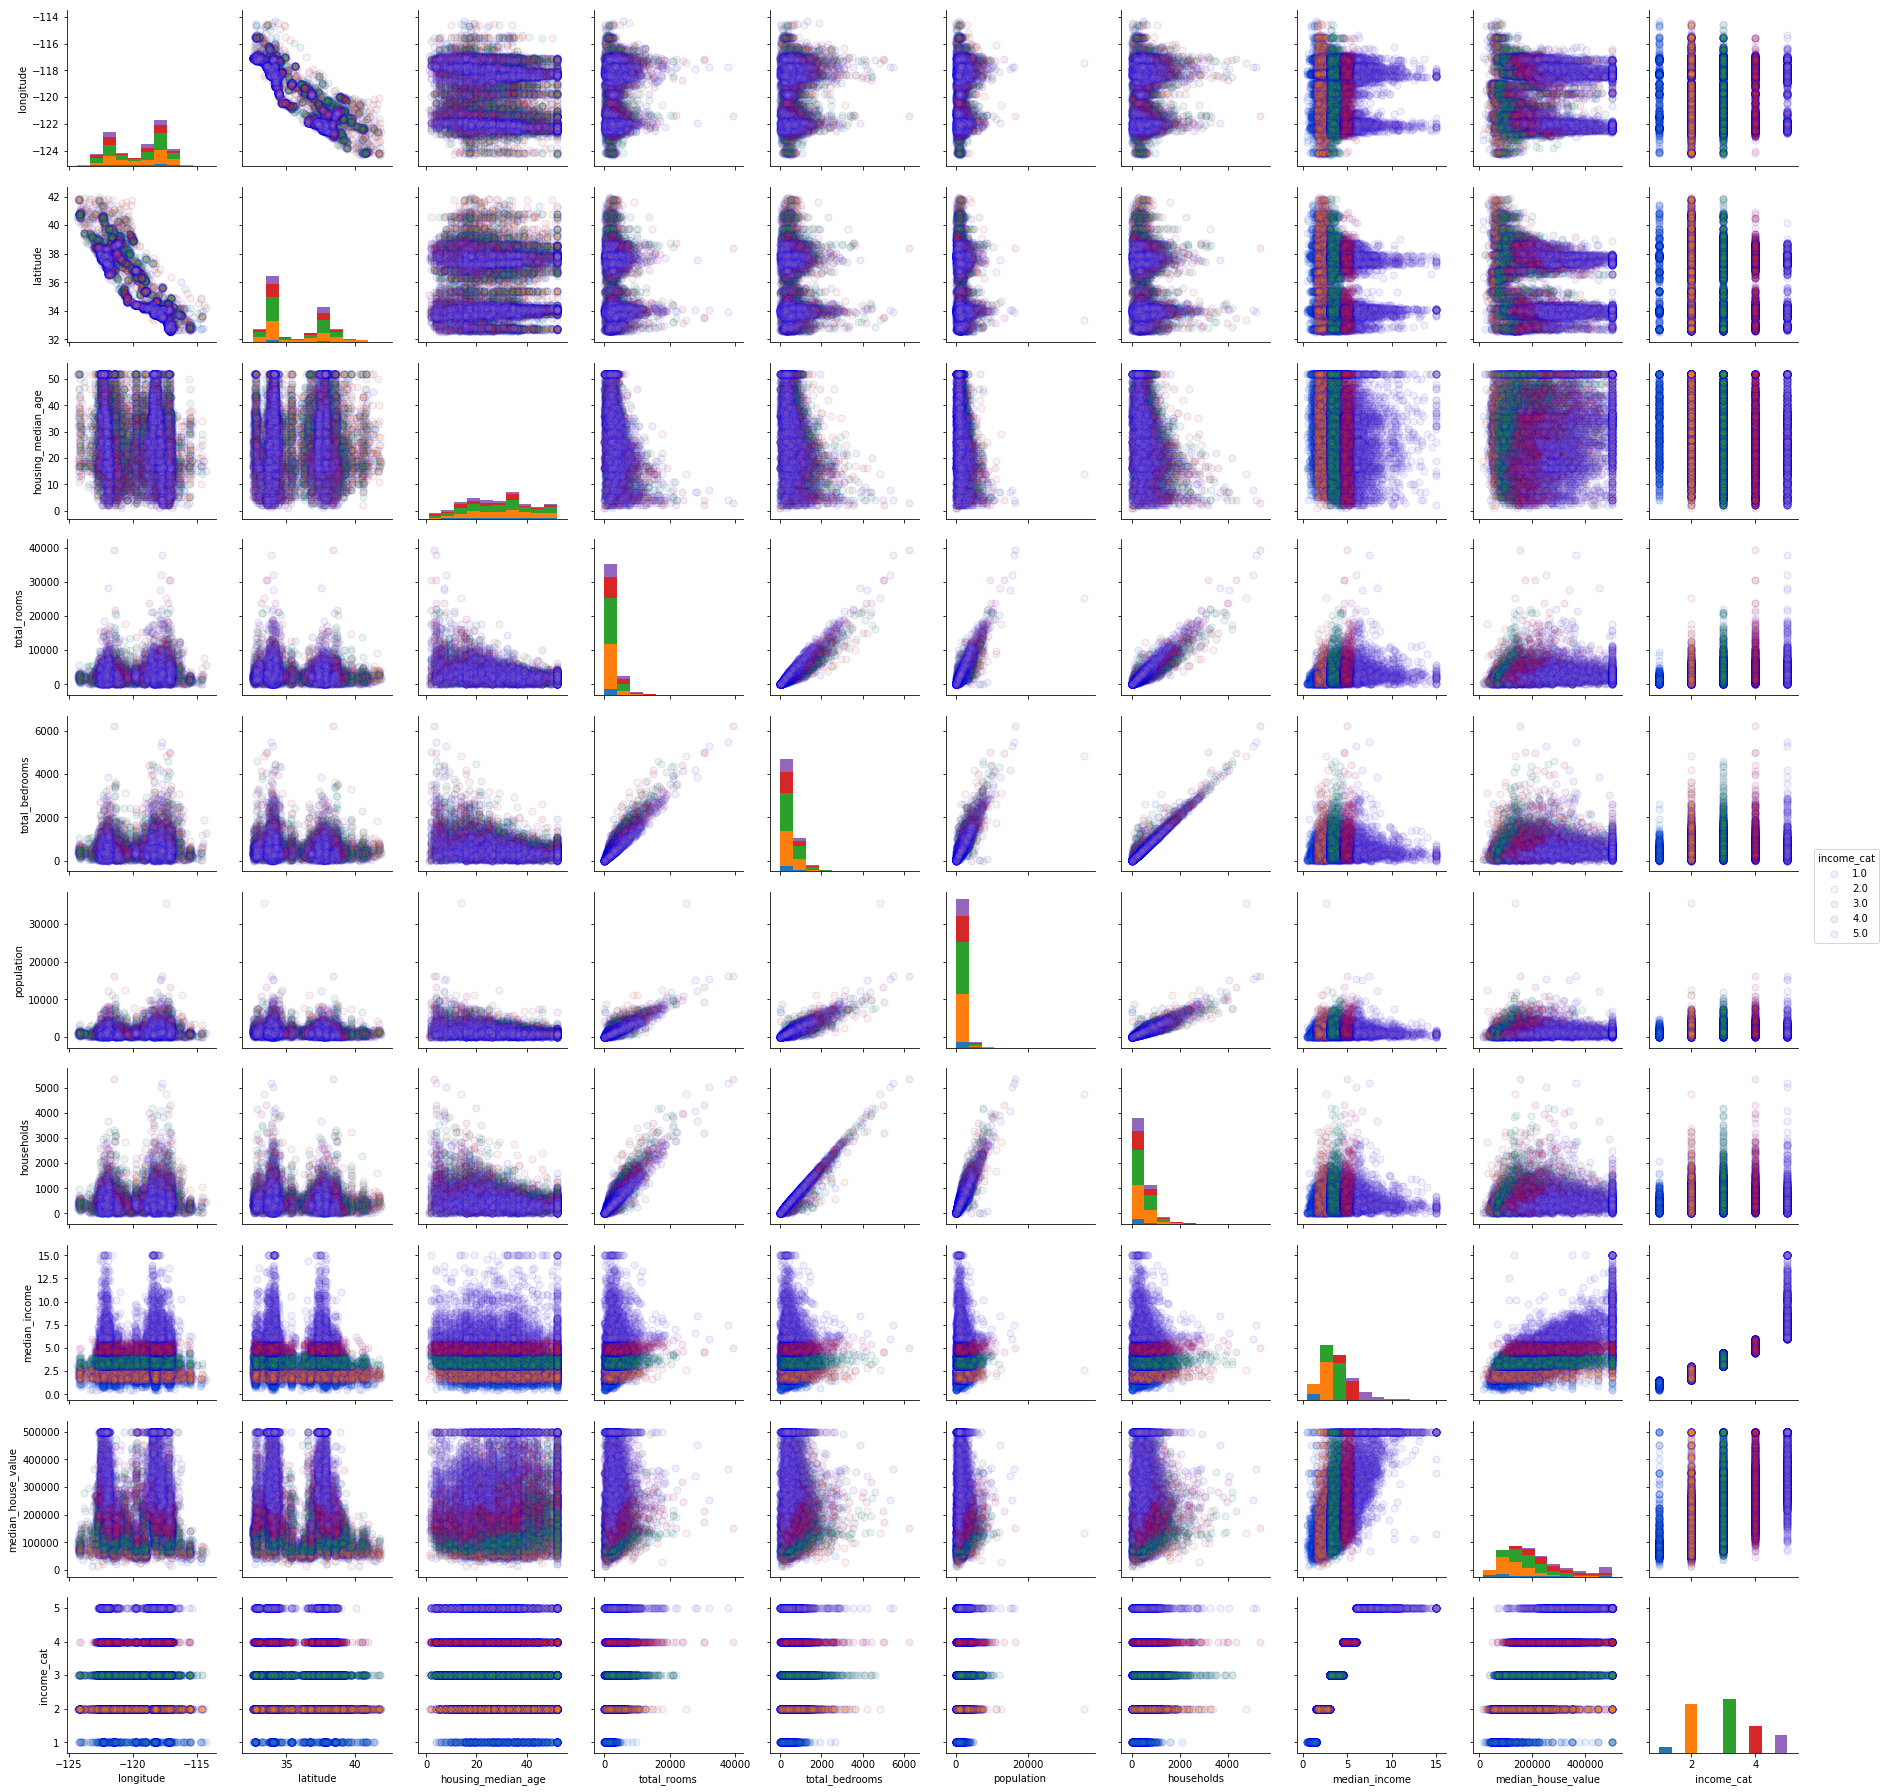

In [17]:
g = sns.pairplot(housing.dropna(), hue = "income_cat",plot_kws=dict(s=50, edgecolor="b", linewidth=1, alpha = 0.1))

### You also noticed that some attributes have a __tail-heavy distribution, so you may want to transform them (e.g., by computing their logarithm).__

In [18]:
corr_matrix = housing.corr()



In [19]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   
income_cat          -0.016243 -0.078848           -0.139385     0.221690   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   
income_cat                0.012502    0.022848    0.034995       0.902156   

                    median_house_value  income_cat  
longitude                    -0.047432   -0.016243  
latitude                     -0.142724   -0.078848  
housing_median_age            0.114110   -0.139385  
total_rooms                   0.135097    0.221690  
total_bedrooms                0.047689    0.012502  
population                   -0.026920    0.022848  
households                    0.064506    0.034995  
median_income                 0.687160    0.902156  
median_house_value            1.000000    0.642274  
income_cat                    0.642274    1.000000

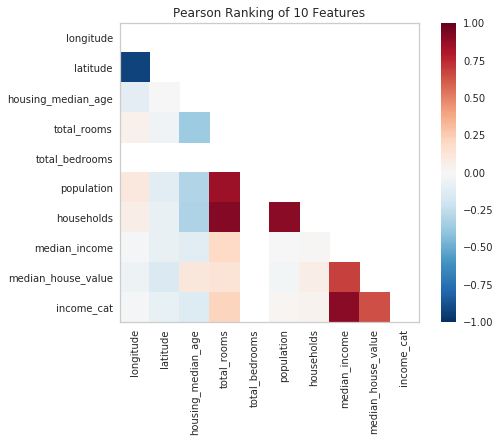

In [26]:
from yellowbrick.features import Rank2D
import warnings
warnings.filterwarnings('ignore')


visualizer = Rank2D(algorithm="pearson")


visualizer.fit_transform(housing.drop("ocean_proximity", axis = 1))
visualizer.poof();

Cool methods to remeber:

- fit_transform  $\rightarrow$ fits and transforms at the same time;
- LabelBinarizer(foo) == (OneHotEncoder $\circ$ LabelEncoder)(foo)
- 

- There is a nice example of creating a custom transformer at page 64

```python
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]



```

- Normalization $\rightarrow$ ($\frac{x - min}{max - min})(0-1)$  $\neq$ Standardization $\rightarrow$ ($\frac{x - \mu}{\sigma}$)

- Pipeline is a great class of sklearn; When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method

### Data imputation

In [27]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

housing_tr = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)

- IT's possible to run many transformation pipelines and then unite then !!!

```python
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs)),
 ('imputer', Imputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribs)),
 ('label_binarizer', LabelBinarizer()),
 ])
full_pipeline = FeatureUnion(transformer_list=[
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])
```

### First steps of ML project

- import dataset $\rightarrow$ describe it $\rightarrow$ split it $\rightarrow$ transform it via pipeline 
- then run it through a list of GridSearchs or RandomizedSearchs;

## Serialization tip
Sklearn __joblib__ is better at serializing numpy arrays than __pickle__

### Gridsearch tip

If GridSearchCV is initialized with refit=True (which is the
default), then once it finds the best estimator using crossvalidation, it retrains it on the whole training set. This is usually a
good idea since feeding it more data will likely improve its perfor‐
mance.

This usual machine learning pipeline is well summarized at Appendix B

# Chapter 3 - Classification

In [31]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [34]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Para abrir notebooks rapido é legal usar https://nbviewer.jupyter.org/github/user/nburlrest

example https://nbviewer.jupyter.org/github/marcelovmaciel/Poodl/blob/master/sim-analysis/03-saltelli-finaloutput.ipynb
https://nbviewer.jupyter.org/github/marcelovmaciel/Poodl/blob/master/sim-analysis/04_1-multirun.ipynb

Just like the cross_val_score() function, __cross_val_predict()__ performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predic‐
tions made on each test fold

__Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced__ (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate (sensitivity) for the cat class but a 0% recognition rate for the dog class.

It's better to use a confusion matrix:

![](imgs/understand_cm.png)

```python 
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(y_train_5, y_pred) # == 4344 / (4344 + 1307)
0.76871350203503808
>>> recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)
0.79136690647482011
```

![](imgs/excm.png)

# There is a tradeoff between precision and recall . 

- One then needs to choose which one to optimize, or if one wants to balance them.

![](imgs/precisionvsrecall.png)

# the ROC curve plots sensitivity (recall) versus 1 – specificity

- A perfect classifier has area under the roc curve (AUC) of 1 ; a purely random has AUC of 0.5. 

So, how do i inspect the performance of a classifier?

- Use confusion matrix (it summarizes precision, recall and accuracy in a single plot);
- Plot Precision X Recall:
 -  you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and ROC otherwise

- Plot ROC and calculate AUC;
- Plot error matrix:
 - Really cool; 

### Strategies to use binary classifiers in multiclass classification tasks:


- __OvA (One versus all)__ : For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.
- __OvO (One  versus One)__ : Test all pairs of classes;


Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO).

### Error analysis

```python
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
```

### Multilabel classification

- IT's when each instance receives more than one label (like whether a digit is high/low and even/odd);
- If each label in a multilabel classification can have multiple classes then we have __multioutput classification__

# Chapter 4 - Training Models


Linear Regression:
$\hat{y} = h_\theta(\mathbf{x}) = \theta^T \cdot \mathbf{x} $

computional cost < vs finding optimum > :
- computional cost : Normal equation (computationally demanding) < gradient descent (batch version uses all the data set) < stochastic gd (based on one instance)

- finding optimum:  Normal equation (computationally demanding) > gradient descent (batch version uses all the data set) > stochastic gd

- stochastic gd with  __simulated annealing__ $\rightarrow$ gradually reduce learning rate according to a __learning schedule__ (quicker and finds the optimum, cool stuff mothafucker)

- __minibatch GD__ = : at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch GD computes the gradients on small random sets of instances called minibatches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs

![](imgs/regopts.png)

### learning curves: 

These are plots of the model’s perfor‐
mance on the training set and the validation set as a function of the training set size.
To generate the plots, simply train the model several times on different sized subsets
of the training set.




In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
    

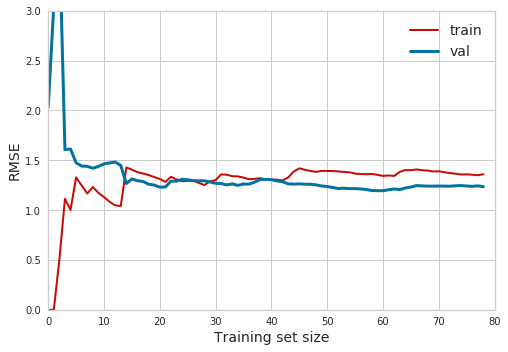

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
#plt.save_fig("underfitting_learning_curves_plot")   # not shown
plt.show() 

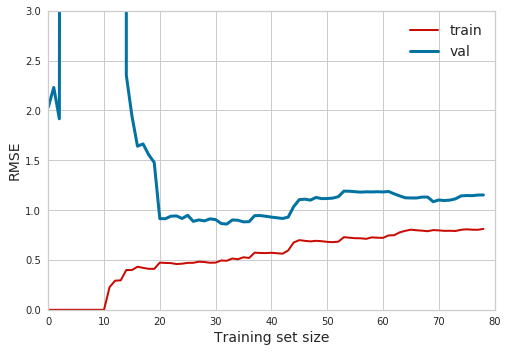

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

### Ridge Regression (l2 norm penalty term), Lasso Regression(l1 norm penalty term), and Elastic Net = regularized regressions (constrained parameters)

### Loss function x performance measure

It is quite common for the cost function used during training to be
different from the performance measure used for testing. Apart
from regularization, another reason why they might be different is
that a good training cost function should have optimizationfriendly derivatives, while the performance measure used for test‐
ing should be as close as possible to the final objective. A good
example of this is a classifier trained using a cost function such as
the log loss (discussed in a moment) but evaluated using precision/
recall.


- It's usually necessary to use some regularization on linear regressions 
- Another way of regularization is __early stopping__ : to stop training as soon as the validation error reaches a minimum. 

### Logistic Regression

- Logistic regression loss functions has no closed form, therefore we use gradient descent
- Just like the other linear models, Logistic Regression models can be regularized using
ℓ1
 or ℓ2
 penalties. Scitkit-Learn actually adds an ℓ2
 penalty by default
 
- The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.


# Learn how to plot the decision boundary of figure 4.23

```python

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()
```

# Softmax Regression

Is a generalization of logistic regression to multiclass problems;

The Softmax Regression classifier __predicts only one class at a time
(i.e., it is multiclass, not multioutput)__ so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.

### Cross Entropy loss
Cross entropy is frequently used to measure how
well a set of estimated class probabilities match the target classes (we will use it again
several times in the following chapters).

![](imgs/celoss.png)